# Homework2 - Shengzhe - Hu

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [467]:
sales=pd.read_csv('Music Sales.csv')
sales.head(2)

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99


In [355]:
searchfor=['Asia','Europe']
a=sales[sales['Region'].str.contains('|'.join(searchfor))]
# select only asia and europe data


# 1. Most Popular Genre

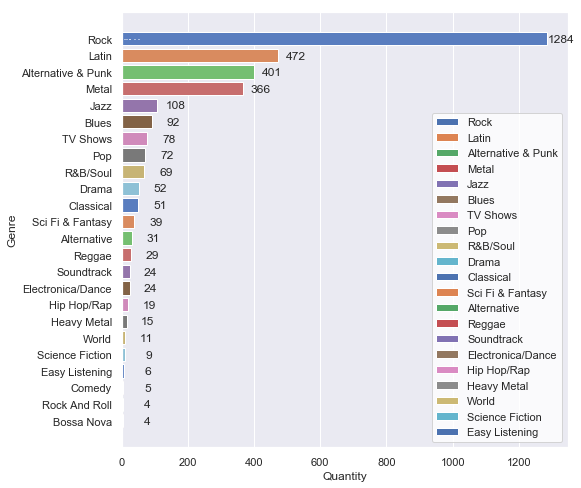

In [354]:

# super stupid solution

genre=list(set(sales['Genre'].tolist()))
g_dict={}
for i in genre:
    if i not in g_dict:
        g_dict[i]=0

count=0
for i in genre:
    for j in a[a['Genre']==i].index.tolist():
        g_dict[i] = g_dict.get(i, 0) + a['Quantity'][j]

sorted_by_value = sorted(g_dict.items(), key=lambda kv: kv[1],reverse=True)

# get a Genre and Quantity tuple

label = []
for i in sorted_by_value:
    label.append(i[0])
label=label[:21]

aaa=pd.DataFrame(sorted_by_value, columns=['Genre', 'Quantity'])
ax5 = sns.barplot( y="Genre", x='Quantity',data=aaa, ci=None,palette='muted')
sns.set(rc={'figure.figsize':(8,8)})
sns.set(style="whitegrid")

# add annotate
for p in ax5.patches:
    ax5.annotate(str(int(p.get_width())), (p.get_x() + p.get_width(), p.get_y()), xytext=(28, -10), textcoords='offset points', horizontalalignment='right')

yl=[0 for _ in range(21)]

# add legend
for x,y,lb in zip(aaa["Quantity"],yl,label):
    ax5.bar(x, y, width, label=lb)

ax5.legend()


# 2. Top 20 Artist

In [474]:
a['counts']=0
sales_artist = a.groupby(['Artist','Genre','Quantity'], as_index=False)['counts'].count().sort_values(by='counts', ascending = False)
sales_artist['total']=sales_artist['Quantity']*sales_artist['counts'] 
sales_artist.drop(['Quantity','counts'],axis=1,inplace=True)
# make sure the value of total count equals to the value in tableau pic


Text(0.5,1,'Top 20 Artist')

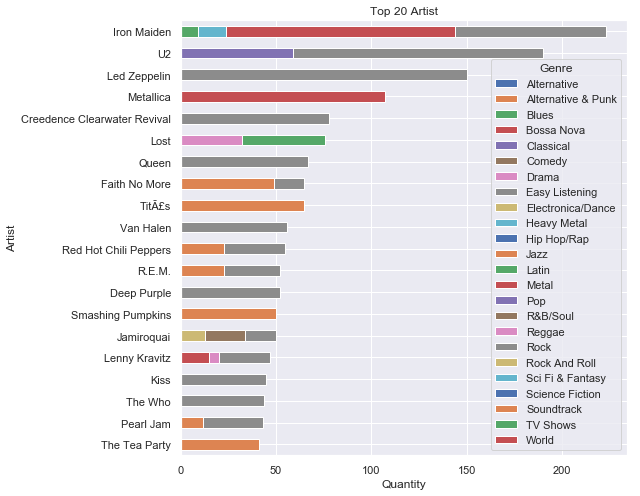

In [473]:
from pandas import pivot_table

sales_artist_pivot = pivot_table(sales_artist, values='total', index=['Artist'],columns=['Genre'], aggfunc=np.sum)

sales_artist_pivot['sum'] = sales_artist_pivot.sum(axis = 1)
sales_artist_pivot
# only keep the top 20 artists by the sum
sales_artist_pivot = sales_artist_pivot.sort_values(by = 'sum', ascending = False).iloc[0:20,:-1]

# plot the figure 
sales_artist_pivot[::-1].plot(kind='barh', stacked=True  )

plt.xlabel('Quantity')
plt.title('Top 20 Artist')


# 5. Rock vs Alt vs Heavy Metal

Text(0.5,1,'Rock vs. Alternative and Punk vs. Heavy Metal')

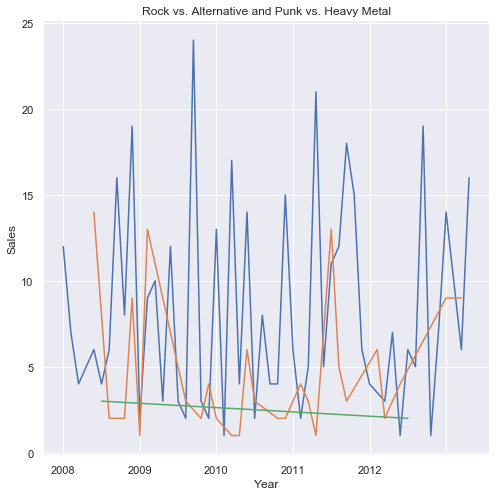

In [578]:
df_average_counts_pivot = pivot_table(df_average_counts, values='counts', index=['year_month'],columns=['Genre'],aggfunc=np.sum)


xs = np.arange(54)


series1 = df_average_counts_pivot['Rock'].astype(np.double)
s1mask = np.isfinite(series1)
series2 = df_average_counts_pivot['Alternative & Punk'].astype(np.double)
s2mask = np.isfinite(series2)
series3 = df_average_counts_pivot['Heavy Metal'].astype(np.double)
s3mask = np.isfinite(series3)

plt.plot(xs[s1mask],series1[s1mask], linestyle='-',label='_nolegend_')
plt.plot(xs[s2mask],series2[s2mask], linestyle='-', label='_nolegend_')
plt.plot(xs[s3mask],series3[s3mask], linestyle='-', label='_nolegend_')

plt.xticks(xs[::10], ('2008', '2009', '2010', '2011', '2012'))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Rock vs. Alternative and Punk vs. Heavy Metal')

